In this document we hope to demonstrate some of the basic plotting techniques. It helps to explain everything in 2d first, so this document will limit itself to that.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (6, 6)

## Imaginary Tokens

Let's make a few word-embeddings. The basic object for this is a `Token` object.

In [3]:
from whatlies import Embedding

foo = Embedding("foo", [0.5, 0.1]) 
bar = Embedding("bar", [0.1, 0.2])
buz = Embedding("buz", [0.3, 0.3])

We can combine these wordembeddings.

These tokens have a representation.

In [4]:
foo

Emb[foo]

But this representation changes when we apply operations to it.

In [5]:
foo | (bar - buz)

Emb[(foo | (bar - buz))]

The internal vector also changes.

In [6]:
foo.vector, (foo | (bar - buz)).vector

(array([0.5, 0.1]), array([ 0.06, -0.12]))

But why read text when we can plot?

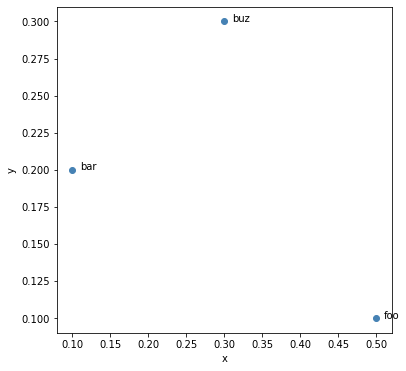

In [7]:
for t in [foo, bar, buz]:
    t.plot(kind="scatter").plot(kind="text");

## Meaning

Let's come up with imaginary embeddings for `man`, `woman`, `king` and `queen`. 

We will plot them using the `arrow` plotting type.

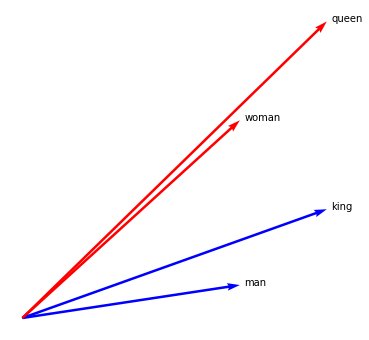

In [8]:
man   = Embedding("man", [0.5, 0.1])
woman = Embedding("woman", [0.5, 0.6])
king  = Embedding("king", [0.7, 0.33])
queen = Embedding("queen", [0.7, 0.9])

man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="blue")
queen.plot(kind="arrow", color="red")
plt.axis('off');

### King - Man + Woman

We can confirm the classic approximation that everybody likes to mention.

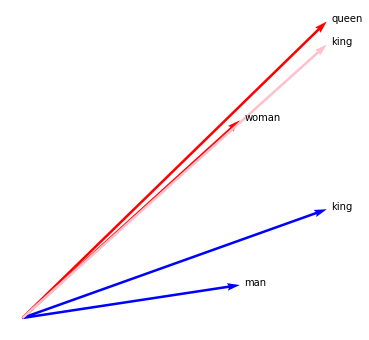

In [9]:
man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="blue")
queen.plot(kind="arrow", color="red")

(king - man + woman).plot(kind="arrow", color="pink")

plt.axis('off');

### King - Queen

But maybe I am interested in the vector that spans between `queen` and `king`. I'll use the `-` operator here to indicate the connection between the two tokens. 

> Notice the poetry there... 

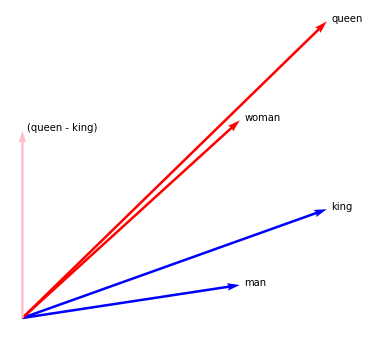

In [11]:
man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="blue")
queen.plot(kind="arrow", color="red")
(queen - king).plot(kind="arrow", color="pink", show_ops=True)
plt.axis('off');

### Man | (Queen - King)

But that space `queen-king` ... we can also filter all that information out of our words. Linear algebra would call this "making it orthogonal". The `|` operator makes sense here.

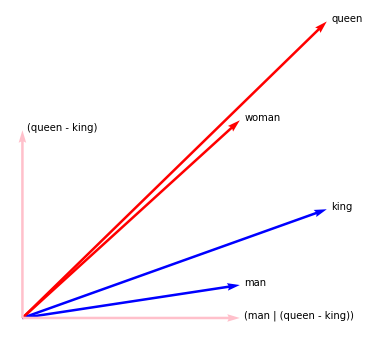

In [12]:
man.plot(kind="arrow", color="blue")
woman.plot(kind="arrow", color="red")
king.plot(kind="arrow", color="blue")
queen.plot(kind="arrow", color="red")

(queen - king).plot(kind="arrow", color="pink", show_ops=True)
(man | (queen - king)).plot(kind="arrow", color="pink", show_ops=True)
plt.axis('off');

## Token Mathmatics

This is interesting. We have our original tokens and can filter away the `(man-woman)` axis. By doing this we get "new" embeddings with different properties. Numerically we can confirm in our example that this new space maps `Token(man)` to be very similar to `Token(woman)`.

In [13]:
(man | (queen - king)).vector, (woman | (queen - king)).vector

(array([0.5, 0. ]), array([5.00000000e-01, 1.11022302e-16]))

Same for `Token(queen)` and `Token(king)` if we filter away the `(man-woman)` axis.

In [14]:
(queen | (man - woman)).vector, (king | (man - woman)).vector

(array([0.7, 0. ]), array([0.7, 0. ]))

But tokens are messy to handle, can't we do this for embeddings in general? 